<big style="font-size:30px;"><center><b>Лабораторная работа №2</b></center></big>

# Цель работы

Освоение основных видов отображений и использование геометрических преобразований для решения задач пространственной коррекции изображений

# Теоретические сведения

Геометрические преобразования изображений подразумевают пространственное изменение местоположения множества пикселей с целочисленными координатами $(x, y)$ в другое множество с координатами $(x', y')$, причем интенсивность пикселей сохраняется. В двумерных плоских геометрических преобразованиях, как правило, используется евклидово пространство $P^2$ c ортонормированной декартовой системой координат. В этом случае пикселю изображения соответствует пара декартовых координат, которые интерпретируются в виде двумерного вектора, представленного отрезком из точки $(0,0)$ до точки $X_i = (x_i, y_i)$. Двумерные преобразования на плоскости можно представить в виде движения точек, соответствующих множеству пикселей.

Для общности с дальнейшими преобразованиями будем использовать однородные координаты, обладающие тем свойством, что определяемый ими объект не меняется при умножении всех координат на одно и то же ненулевое число. Из-за этого свойства необходимое количество координат для представления точек всегда на одну больше, чем размерность пространства $P^n$, в котором эти координаты используются. Например, для представления точки 𝑋 = (𝑥,𝑦) на плоскости в двумерном пространстве $P^2$ необходимо три координаты $X = (x, y, w)$. Проиллюстрируем это следующим примером:

$$\begin{bmatrix} x' \\ y' \\ w \end{bmatrix} = w \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \Leftrightarrow \begin{bmatrix} x' & y' & w\end{bmatrix} = \begin{bmatrix} x & y & 1\end{bmatrix}w  \tag{1}$$

где $w$ — скалярный произвольный множитель, $x = \frac{x'}{w}$, $y = \frac{y'}{w}$

При помощи троек однородных координат и матриц третьего порядка можно описать любое линейное преобразование плоскости. Таким образом, геометрические преобразования являются матричными преобразованиями, и множества координат пикселей преобразованного и исходного изображений связаны следующим матричным соотношением либо в строчном виде $X' = XT$, либо в столбцовом $X' = T^TX$. Распишем эти матричные соотношения:

$$\begin{bmatrix} x' & y' & w'\end{bmatrix} = \begin{bmatrix} x & y & w\end{bmatrix} \cdot \begin{bmatrix} A & D & G \\ B & E & H \\ C & F & I\end{bmatrix}  \tag{2}$$

$$\Leftrightarrow \begin{bmatrix} x' \\ y' \\ w'\end{bmatrix} = \begin{bmatrix} A & B & C \\ D & E & F \\ G & H & I\end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ w \end{bmatrix} \tag{3}$$

Точка с декартовым координатами $(x, y)$ в однородных координатах запишется как $(x, y, 1)$:

$$\begin{bmatrix} x' & y' & 1\end{bmatrix} = \begin{bmatrix} x & y & 1\end{bmatrix} \cdot \begin{bmatrix} A & D & 0 \\ B & E & 0\\ C & F & 1\end{bmatrix} \tag{4}$$

$$ \Leftrightarrow \begin{bmatrix} x' \\ y' \\ 1\end{bmatrix} \cdot \begin{bmatrix} A & B & C \\ D & E & F \\ 0 & 0 & 1\end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \tag{5}$$

Формулу $(4)$ можно представить в виде следующей системы уравнений:

$$\left\{ \begin{matrix} x' = Ax + By + C \\ y' = Dx + Ey + F \end{matrix} \right. \tag{6}$$

## Линейные преобразования

### Конформное отображениe

_Конформное отображение_ — это отображение, при котором сохраняется форма бесконечно малых фигур и углы между кривыми в точках их пересечения. Основными линейными конформными преобразованиями являются евклидовы преобразования. К ним относятся сдвиг, отражение, однородное масштабирование и поворот. Конформные преобразования являются подмножеством аффинных преобразований.

На рисунке ниже представлено конформное отображение: перпендикулярность линий в местах их пересечений сохраняется:

<img src="./src/1.png" width=700 heigth=400>

### Сдвиг изображения

Система уравнений $(6)$ и матрица преобразования координат $T$ в случае _сдвига_ изображения $A = E = 1$, $B = D = 0$ примут вид:

$$\left\{ \begin{matrix} x' = x + C \\ y' = y + D \end{matrix} \right. \tag{7}$$

$$\Leftrightarrow \begin{bmatrix} x' & y' & 1\end{bmatrix} = \begin{bmatrix} x & y & 1\end{bmatrix} T \Rightarrow T = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ C & F & 1\end{bmatrix} \tag{8}$$

где $C$ и $F$ — сдвиг по осям $Ox$ и $Oy$ соответственно.

При этом в библиотеке OpenCV матрицы хранятся в виде строк, поэтому следует использовать формулу $(5)$ для задания матрицы преобразования:

$$ \begin{bmatrix} x' \\ y' \\ 1\end{bmatrix} = T \begin{bmatrix} x \\ y \\ 1\end{bmatrix} \Rightarrow T = \begin{bmatrix} 1 & 0 & C \\ 0 & 1 & F \\ 0 & 0 & 1\end{bmatrix} \tag{9}$$

Кроме того, последний ряд матрицы не хранится, поэтому матрица будет задаваться следующим образом:

$$ T = \begin{bmatrix} 1 & 0 & C \\ 0 & 1 & F \end{bmatrix} \tag{10}$$

### Отражение изображения

Система уравнений $(6)$ и матрица преобразования координат $T$ в случае отражения изображения вдоль оси $Ox$ при $A=1$, $E=-1$, $B=C=D=F=0$ примут вид:

$$\left\{ \begin{array}{lll} x' = x \\ y' = -y \end{array} \right. \Rightarrow T = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1\end{bmatrix} \tag{11}$$

В случае использования библиотеки OpenCV матрица преобразования для отражения изображения определяется следующим образом:

$$ T = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & I.rows - 1 \end{bmatrix} \tag{12}$$

Дополнительный сдвиг изображения необходим для устранения отрицательных координат пикселей изображения, которые будут получены после преобразования.

### Однородное масштабирование изображения

Система уравнений $(6)$ и матрица преобразования координат $T$ в случае _масштабирования_ изображения $A = \alpha$, $E = \beta$, $B = C = D = F = 0$ примут вид:

$$\left\{ \begin{matrix} x' = \alpha x, \alpha > 0 \\ y' = \beta y, \beta >0 \end{matrix} \right. \Rightarrow T = \begin{bmatrix} \alpha & 0 & 0 \\ 0 & \beta & 0 \\ 0 & 0 & 1\end{bmatrix} \tag{13}$$

если $\alpha < 1$ и $\beta < 1$, то изображение уменьшается, если $\alpha > 1$ и $\beta > 1$ — увеличивается. Если $\alpha \neq \beta$, то пропорции будут не одинаковыми по ширине и высоте. В общем случае данное отображение будет являться аффинным, а не конформным.

В случае использования библиотеки OpenCV матрица преобразования для масштабирования изображения определяется следующим образом:

$$T = \begin{bmatrix} \alpha & 0 & 0 \\ 0 & \beta & 0\end{bmatrix} \tag{14}$$

### Поворот изображения

Система уравнений $(6)$ и матрица преобразования координат $T$ в случае поворота изображения по часовой стрелке $A = \cos{\phi}$, $B = -\sin{\phi}$, $D = \sin{\phi}$, $E = \cos{\phi}$, $C = F = 0$ примут вид:

$$\left\{ \begin{matrix} x' = x \cos{\varphi} - y \sin{\varphi} \\ y' = x \sin{\varphi} + y \cos{\varphi} \end{matrix} \right. \Rightarrow T = \begin{bmatrix} \cos{\varphi} & \sin{\varphi} & 0 \\ -\sin{\varphi} & \cos{\varphi} & 0 \\ 0 & 0 & 1\end{bmatrix} \tag{15}$$

Если $\varphi = 90^\circ$, то $\cos{\varphi} = 0$ и $\sin{\varphi} = 1$ и выражение $(15)$ примет вид:

$$\left\{ \begin{array}{lll} x' = -y \\ y' = x \end{array} \right. \Rightarrow T = \begin{bmatrix} 0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix} \tag{16}$$

В случае использования библиотеки OpenCV матрица преобразования для поворота изображения определяется следующим образом:

$$ T = \begin{bmatrix} \cos{\varphi}  & -\sin{\varphi} & 0 \\ \sin{\varphi} & \cos{\varphi} & 0\end{bmatrix} \tag{17}$$

Так как при использовании матрицы преобразования $(17)$ поворот осуществляется вокруг верхнего левого угла изображения с координатами $(0, 0)$, то поворот вокруг произвольной точки следует определять как сдвиг изображения так, чтобы желаемая точка вращения находилась в верхнем левом углу, затем поворот на заданный угол и обратный сдвиг. Это преобразование можно вычислить в матричной форме, а затем выполнить как одно аффинное преобразование. Например для поворота изображения вокруг его центра матрица поворота будет вычисляться следующим образом:

$$T1 = \begin{bmatrix} 1 & 0 & \frac{-(I.cols - 1)}{2} \\ 0 & 1 & \frac{-(I.rows - 1)}{2} \\ 0 & 0 & 1 \end{bmatrix} \tag{18}$$

$$T2 = \begin{bmatrix} \cos{\alpha} & -\sin{\varphi} & 0 \\ \sin{\varphi} & \cos{\varphi} & 0 \\ 0 & 0 & 1 \end{bmatrix} \tag{19}$$

$$T3 = \begin{bmatrix} 1 & 0 & \frac{(I.cols - 1)}{2} \\ 0 & 1 & \frac{(I.rows - 1)}{2} \\ 0 & 0 & 1 \end{bmatrix} \tag{20}$$

где матрица $T1$ — это прямой сдвиг для совмещения точки $(0, 0)$ с центром изображения, $T2$ — матрица преобразования вращения на угол $\varphi$, а $T3$ — обратный сдвиг. Полная матрица преобразования $T$ вычисляется путем матричного умножения этих трех матриц преобразования:

$$T = T3 \cdot T2 \cdot T1 \tag{21}$$

Учитывая то, что в библиотеке OpenCV используются только первые две строки матрицы для аффинного преобразования, требуется убрать последнюю строку после умножения промежуточных квадратных матриц преобразования.

### Аффинное отображение

_Аффинное отображение_ — это отображение, при котором параллельные прямые переходят в параллельные прямые, пересекающиеся в пересекающиеся, скрещивающиеся в скрещивающиеся; сохраняются отношения длин отрезков, лежащих на одной прямой (или на параллельных прямых), и отношения площадей фигур.

Базовыми преобразованиями являются конформные преобразования, скос и неоднородное масштабирование. Произвольное аффинное преобразование можно получить при помощи последовательного произведения матриц базовых преобразований. В непрерывной геометрии любое аффинное преобразование имеет обратное аффинное преобразование, а произведение прямого и обратного дает единичное преобразование, которое оставляет все точки на месте. Аффинные преобразования являются подмножеством проекционных преобразований.

В библиотеке OpenCV присутствует функция `getAffineTransform()`, предназначенная для вычисления матрицы произвольного аффинного преобразования, заданного набором координат исходных точек изображения $(x_1, y_1), (x_2, y_2), (x_3, y_3)$ и их координат после преобразования $(x'_1, y'_1), (x'_2, y'_2), (x'_3, y'_3)$.

<img src="./src/2.png" width=400 heigth=300>

<img src="./src/3.png" width=600 heigth=300>

Вычисленная функцией `getAffineTransform()` матрица $T$ может быть применена с использованием функции `warpAffine()`

### Скос изображения

Система уравнений $(6)$ и матрица преобразования координат $T$ в случае скоса изображения $A = E = 1, B = s, C = D = F = 0$ примут вид:

$$\left\{ \begin{array}{lll} x' = x + sy \\ y' = y \end{array} \right. \Rightarrow T = \begin{bmatrix} 1 & 0 & 0 \\ s & 1 & 0 \\ 0 & 0 & 1\end{bmatrix} \tag{22}$$

В случае использования библиотеки OpenCV матрица преобразования для скосв изображения определяется следующим образом:

$$T = \begin{bmatrix} 1 & s & 0 \\ 1 & 0 & 0 \end{bmatrix} \tag{23}$$

### Кусочно-линейные преобразования

_Кусочно-линейное отображение_ — это отображение, при котором изображение разбивается на части, а затем к каждой из этиx частей применяются различные линейные преобразования.

При использовании библиотеки OpenCV кусочно-линейные преобразования выполняются с использованием специального типа изображений, называемых ROI — Region of Interest, которые создаются ограничением области исходного изображения. Этот тип изображений имеет общие данные с исходным, но при этом может использоваться аналогично с обычным изображением

## Нелинейные преобразования

При рассмотрении геометрических преобразований предполагается, что изображения получены при помощи идеальной модели камеры. В действительности формирование изображений сопровождается различными нелинейными искажениями. Для их коррекции используются различные нелинейные функции.

Примеры нелинейных искажений:

<img src="./src/4.png" width=700 heigth=300>

### Проекционное преобразование

_Проекционное отображение_ — это отображение, при котором прямые линии остаются прямыми линиями, однако геометрия фигуры может быть нарушена, т.к. данное отображение в общем случае не сохраняет параллельности линий. Свойством, сохраняющимся при проективном преобразовании, является коллинеарность точек: три точки, лежащие на одной прямой (коллинеарные), после преобразования остаются на одной прямой. Проекционное отображение может быть как параллельным (изменяется масштаб), так и проективным (изменяется геометрия фигуры).

Пример проекционного проективного отображение: прямые остались прямыми, но параллельные отобразились в скрещивающиеся:

<img src="./src/5.png" width=700 heigth=300>

В случае проективного отображения точки трехмерной сцены $P^3$ проецируются на двумерную плоскость $P^2$ изображения. Такое преобразование $P^3 \rightarrow P^2$ отображает евклидову точку сцены $P = (x, y, z)$ (в однородных координатах $(x', y', z', w)$) в точку изображения $X = (x, y)$ (в однородных координатах $(x', y', w)$). Для нахождения декартовых координат точек из однородных координат воспользуемся следующими соотношениями: $P = \left( \frac{x'}{w}, \frac{y'}{w}, \frac{z'}{w} \right)$ — координаты вектора $P$ и $X = \left( \frac{x'}{w}, \frac{y'}{w} \right)$ — координаты вектора $X$. Подставляя в $(2)$ $w  = 1$, для вектора $X$ получим систему уравнений:

$$\left\{ \begin{array}{lll} x' = \frac{Ax + By + C}{Gx + Hy + I} \\ y' = \frac{Dx + Ey + F}{Gx + Hy + I} \end{array} \right. \Rightarrow T = \begin{bmatrix} A & B & C \\ D & E & F \\ G & H & 1\end{bmatrix} \tag{24}$$

Из-за нормирования координат на $w'$ в общем случае проекционное отображение является нелинейным.

В библиотеке OpenCV присутствует функция `getPerspectiveTransform()`, предназначенная для вычисления матрицы произвольного проекционного отображения, заданного набором координат исходных точек изображения $(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4)$ и их координат после преобразования $\left(x'_1, y'_1 \right), \left(x'_2, y'_2 \right), \left(x'_3, y'_3 \right), \left(x'_4, y'_4 \right)$.

### Полиномиальное преобразование

_Полиномиальное отображение_ — это отображение исходного изображения с помощью полиномов. В данном случае матрица преобразования координат $T$ будет содержать коэффициенты полиномов соответствующих порядков для координат $x$ и $y$. Например, в случае полиномиального преобразования второго порядка система уравнений $(6)$ примет вид:

$$\left\{ \begin{array}{lll} x' = a_1 + a_2x + a_3y + a_4x^2 + a_5xy + a_6y^2 \\ y' = b_1 + b_2x + b_3y + b_4x^2 + b_5xy + b_6y^2\end{array} \right. \tag{25}$$

где $x$, $y$ — координаты точек в одной системе координат; $x'$, $y'$ — координаты этих точек в другой системе координат; $a_1 \dots a_6$, $b_1 \dots b_6$ — коэффициенты преобразования

Следует отметить, что при использовании языка программирования Python попиксельная работа с изображением крайне неэффективна. Вместо этого необходимо вычислить новые координаты для каждого пикселя исходного изображения и применить их с использованием индексации NumPy. Для начального формирования массивов переиндексации используется специальный конструктор `numpy.meshgrid()`. Он создает два массива координат $X$ и $Y$ для каждого пикселя изображения. Затем эти координаты преобразуются и используются для сопоставления координат новых пикселей изображения со старыми. Матрица `mask` используется для исключения пикселей, вышедших за пределы допустимого диапазона после преобразования.

Смещение координат пикселей в преобразованном изображении:

<img src="./src/6.png" width=300 heigth=300>

Как правило, при нелинейном искажении коэффициенты $a_1 \dots a_6$, $b_1 \dots b_6$ и матрица преобразования координат $T$ неизвестны. В случае, когда помимо искаженного изображения доступно исходное, можно вычислить коэффициенты преобразования, найдя пары соответствующих точек на исходном и преобразованном изображениях. Число минимально необходимых пар точек вычисляется по формуле:

$$t_{min} = \frac{(n + 1)(n + 2)}{2} \tag{26}$$

Если имеет место полиномиальное искажение второго порядка, то согласно $(26)$ необходимо знать координаты хотя бы шести пар соответствующих точек до и после трансформации:$(x_1, y_1) \dots (x_6, y_6)$ и $\left(x'_1, y'_1\right) \dots \left(x'_6, y'_6\right)$. Согласно $(25)$ запишем уравнения для вычисления коэффициентов в матричном виде:

$$\begin{bmatrix} a_1 \\ \dots \\ a_6 \end{bmatrix} = \begin{bmatrix} 1 & x_1 & y_1 & x^2_1 & x_1y_1 & y^2_1 \\ \dots & \dots & \dots & \dots & \dots & \dots \\ 1 & x_6 & y_6 & x^2_6 & x_6y_6 & y^2_6 \end{bmatrix}^{-1} \begin{bmatrix} x'_1 \\ \dots \\ x'_6 \end{bmatrix} \tag{27}$$

$$\begin{bmatrix} b_1 \\ \dots \\ b_6 \end{bmatrix} = \begin{bmatrix} 1 & x_1 & y_1 & x^2_1 & x_1y_1 & y^2_1 \\ \dots & \dots & \dots & \dots & \dots & \dots \\ 1 & x_6 & y_6 & x^2_6 & x_6y_6 & y^2_6 \end{bmatrix}^{-1} \begin{bmatrix} y'_1 \\ \dots \\ y'_6 \end{bmatrix} \tag{28}$$

### Синусоидальное искажение

В качестве еще одного из примеров нелинейного преобразования можно рассмотреть гармоническое искажение изображения.

Функция библиотеки OpenCV `remap()` преобразует изображение в соответствии с новыми координатами пикселей, заданными для каждого пикселя исходного изображения.

## Коррекция дисторсии

При формировании изображения оптической системой на нем может возникнуть дисторсия. Дисторсия — это оптическое искажение, выражающееся в искривлении прямых линий. Световые лучи, проходящие через центр линзы, сходятся в точке, расположенной дальше от линзы, чем лучи, проходящие через ее края. Прямые линии искривляются за исключением тех, которые лежат в одной плоскости с оптической осью. Например, изображение квадрата, центр которого пересекает оптическая ось, имеет вид подушки (подушкообразная дисторсия) при положительной дисторсии и вид бочки (бочкообразная дисторсия) при отрицательной дисторсии:

Примеры дисторсий. Слева — исходное изображение, по центру — подушкообразная дисторсия, справа — бочкообразная.

<img src="./src/7.png" width=700 heigth=400>

Пусть $r = (x, y)$ — вектор, задающий две координаты в плоскости, расположенной перпендикулярно оптической оси. Для идеального изображения все лучи, вышедшие из этой точки и прошедшие через оптическую систему, попадут в точку изображения с координатами $R$, которые определяются по формуле:

$$R = b_0r \tag{29}$$

где $b_0$ — коэффициент линейного увеличения.

Если присутствует дисторсия более высокого порядка (для осесимметричных оптических систем дисторсия может быть только нечетных порядков: третьего, пятого, седьмого и т.д.), то в выражение $(29)$ необходимо добавить соответствующие слагаемые:

$$R = b_0r + F_3l^2r + F_5l^4r + \dots \tag{30}$$

где $l$ — длина вектора $r$; $F_i, i = 3, 5, \dots, n$ — коэффициенты дисторсии $n$-го порядка, которые вносят наибольший вклад в искажение формы изображения. При дисторсии третьего порядка, если коэффициент $F_3$ имеет тот же знак, что и $b_0$: $sign(F_3) = sign(b_0)$, возникает подушкообразное искажение, в противном случае — бочкообразное.

Для коррекции дисторсии используется подход, описанный выше для проективного отображения. Используется изображение регулярной сетки и его искаженное изображение, находятся пары точек на этих изображениях и вычисляются коэффиценты корректирующего преобразования.

## «Сшивка» изображений

Геометрические преобразования можно использовать, например, для построения мозаики из нескольких изображений. Мозаика («сшивка», «склейка») — это объединение двух или более изображений в единое целое, причем системы координат склеиваемых изображений могут отличаться из-за разного ракурса съемки, изменения положения камеры или движения самого объекта. Однако необходимо, чтобы оба изображения имели области перекрытия, т.е. на них присутствовали одинаковые объекты. Основной задачей обработки таких изображений является приведение их в общую систему координат. В качестве общей системы координат можно использовать систему первого изображения, тогда требуется найти преобразование координат всех пикселей второго изображения $(x, y)$ в общую систему координат $(x′, y′)$. Если имеет место полиномиальное искажение, то для пересчета координат можно воспользоваться системой уравнений $(25)$. В случае аффиного отображения система $(25)$ примет вид:

$$\left\{ \begin{array}{lll} x' = a_1 + a_2x + a_3y \\ y' = b_1 + bx + b_3 \end{array} \right. \tag{31}$$

Поэтому необходимо найти лишь по 3 коэффициента преобразования по каждой координате:

$$\begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix} = \begin{bmatrix} 1 & x_1 & y_1 \\ 1 & x_2 & y_2 \\ 1 & x_3 & y_3 \end{bmatrix}^{-1} \begin{bmatrix} x_1' \\ x_2' \\ x_3' \end{bmatrix} \tag{32}$$

$$\begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} = \begin{bmatrix} 1 & x_1 & y_1 \\ 1 & x_2 & y_2 \\ 1 & x_3 & y_3 \end{bmatrix}^{-1} \begin{bmatrix} y_1' \\ y_2' \\ y_3' \end{bmatrix} \tag{33}$$

Для этого на обоих изображениях следует выбрать соответствующие пары точек (три пары в случае аффинного искажения и
не менее шести пар в случае полиномиального искажения)

### Автоматическая склейка изображений в библиотеке OpenCV

Библиотека OpenCV предоставляет специальный класс для автоматического «склеивания» изображений, который называется `Stitcher`. Он предназначен для автоматической «склейки» панорамных фотографий (`cv2.Stitcher_PANORAMA`), и для автоматической «склейки» отсканированных изображений (`cv2.Stitcher_SCANS`).

# Ход выполнения работы

## Постановка задачи

1. _Простейшие геометрические преобразования_. Выбрать произвольное изображение. Выполнить над ним линейные и нелинейные преобразования (конформные, аффинные и проективные отображения).
2. _Коррекция дисторсии_. Выбрать произвольное изображение либо с подушкообразной, либо с бочкообразной дисторсией. Выполнить коррекцию изображения.
3. _«Склейка» изображений_. Выбрать два изображения (снимки с фотокамеры, фрагменты сканированного изображения и пр.), на которых имеется область пересечения. Выполнить коррекцию второго изображения для его перевода в систему координат первого; затем выполнить автоматическую «склейку» из двух изображений в одно.

## Библиотеки и настройки

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from typing import Tuple, List

In [2]:
%matplotlib inline

## Используемые функции

In [3]:
def show(images: List, labels: List[str] = None, figsize=(8.5, 4), dpi=100) -> None:

    if not isinstance(images, list):
        images = [images, ]
        
    if isinstance(labels, str):
        labels = [labels, ]
    
    for i, image in enumerate(images):
        fig, ax = plt.subplots(nrows=1, ncols=1,
                               figsize=figsize, dpi=dpi,
                               constrained_layout=True)
        if labels:
            fig.suptitle(labels[i])
        
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    
    plt.show()

## Простейшие геометрические преобразования

In [4]:
class ImageTransform:

    def __init__(self, img):
        self.__img = img
        self.rows, self.cols = img.shape[0:2]
        self.max_x, self.max_y = self.cols, self.rows

    @property
    def img(self):
        return self.__img

    @img.setter
    def img(self, img):
        self.__img = img
        self.rows, self.cols = img.shape[0:2]
        self.max_x, self.max_y = self.cols, self.rows

    def shift(self, x: int = 0, y: int = 0):
        T = np.float32([[1, 0, x], [0, 1, y]])
        return cv2.warpAffine(self.img, T, (self.cols, self.rows))

    def reflection(self, axis=0):
        return cv2.flip(self.img, axis)

    def scale(self, x: int = 0, y: int = 0):
        return cv2.resize(self.img, None, fx=x, fy=y,
                          interpolation=cv2.INTER_CUBIC)

    def rotate(self, phi):
        T = cv2.getRotationMatrix2D(
            ((self.cols-1) / 2, (self.rows-1) / 2), -phi, 1)
        return cv2.warpAffine(self.img, T, (self.cols, self.rows))

    def affine(self, src=None, dst=None):
        default = [[0, 0], [self.cols, 0], [0, self.rows]]
        if src is None:
            src = default
        if dst is None:
            dst = default
        T = cv2.getAffineTransform(np.float32(src),
                                   np.float32(dst))
        return cv2.warpAffine(self.img, T, (self.cols, self.rows))

    def skew(self, s: float = 0):
        T = np.float32([[1, s, 0], [0, 1, 0]])
        return cv2.warpAffine(self.img, T, (self.cols, self.rows))

    def piecewiselinear(self, stretch_x: int = 1, stretch_y: int = 1):
        img = self.img.copy()
        mid_x, mid_y = int(self.cols / 2), int(self.rows / 2)
        Tx = [[stretch_x, 0, 0], [0, 1, 0]]
        Ty = [[1, 0, 0], [0, stretch_y, 0]]
        img[:, mid_x:, :] = cv2.warpAffine(img[:, mid_x:, :], np.float32(Tx),
                                           (self.cols - mid_x, self.rows))
        img[mid_y:, :, :] = cv2.warpAffine(img[mid_y:, :, :], np.float32(Ty),
                                           (self.cols, self.rows - mid_y))
        return img

    def projection(self, src=None, dst=None):
        default = [[0, self.rows], [self.cols, self.rows],
                   [self.rows, 0], [0, 0]]
        if src is None:
            src = default
        if dst is None:
            dst = default
        T = cv2.getPerspectiveTransform(np.float32(src), np.float32(dst))
        return cv2.warpPerspective(self.img, T, (self.cols, self.rows))

    def polynomial(self, x_coefs=[0, 1, 0, 0, 0, 0], y_coefs=[0, 0, 1, 0, 0, 0]):
        img = np.zeros(self.img.shape, self.img.dtype)

        x, y = np.meshgrid(np.arange(self.cols),
                           np.arange(self.rows))

        vars = np.array([1, x, y, x**2, x*y, y**2], dtype=object)
        x_new = (np.sum(x_coefs * vars)).astype(int)
        y_new = (np.sum(y_coefs * vars)).astype(int)

        mask = ((x_new >= 0) & (x_new < self.cols) &
                (y_new >= 0) & (y_new < self.rows))

        if self.img.ndim == 2:
            img[y_new[mask], x_new[mask]] = self.img[y[mask], x[mask]]
        else:
            img[y_new[mask], x_new[mask], :] = self.img[y[mask], x[mask], :]

        return img

    def sinusoidal(self, amplitudes: List[int] = [0, 0],
                   periods: List[int] = [0, 0]):

        x, y = np.meshgrid(np.arange(self.cols, dtype=np.float32),
                           np.arange(self.rows, dtype=np.float32))

        x = x + amplitudes[0] * np.sin(2 * np.pi * y / (periods[0] + 1e-15))
        y = y + amplitudes[1] * np.sin(2 * np.pi * x / (periods[1] + 1e-15))

        return cv2.remap(self.img, x, y, cv2.INTER_LINEAR)

In [5]:
it = ImageTransform(cv2.imread('pictures/1.jpg'))

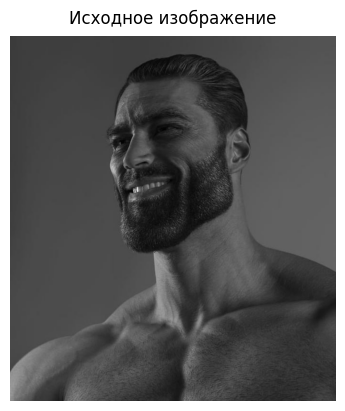

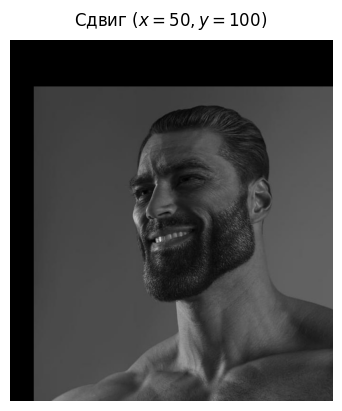

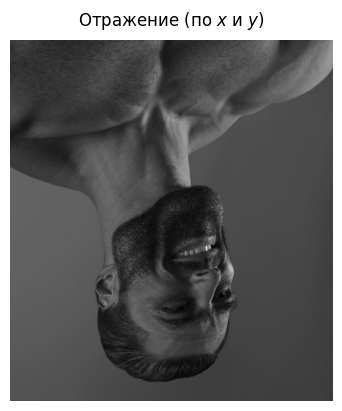

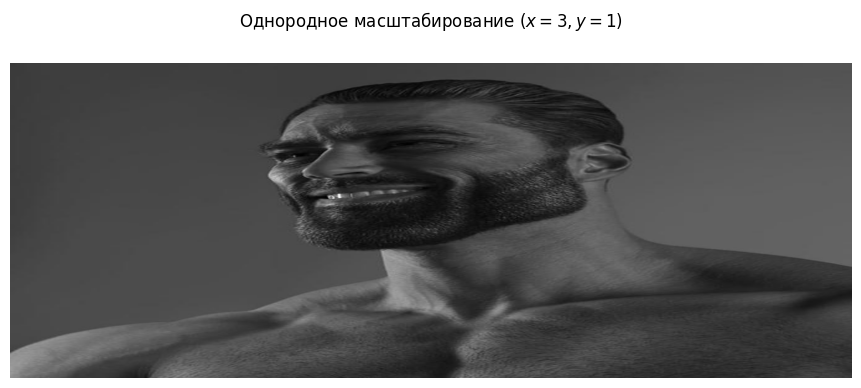

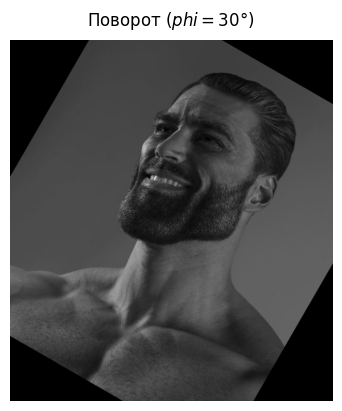

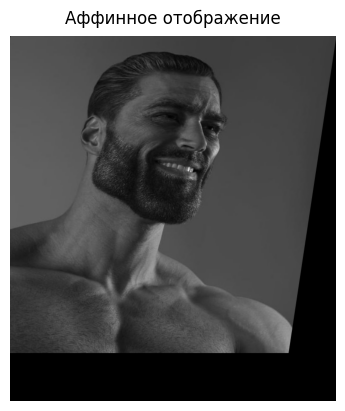

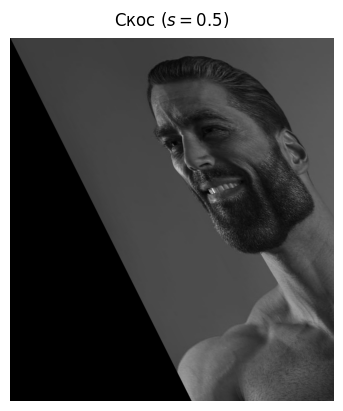

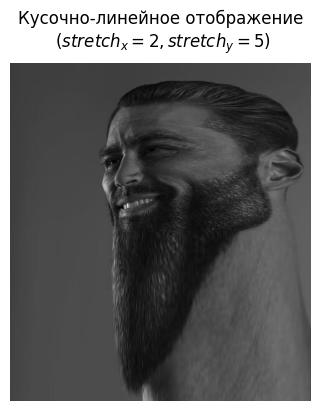

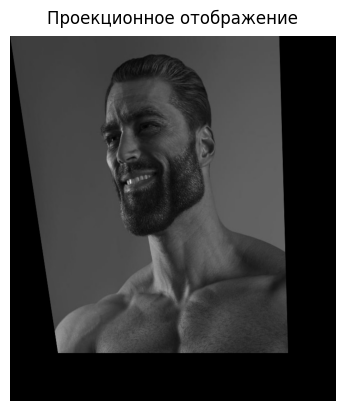

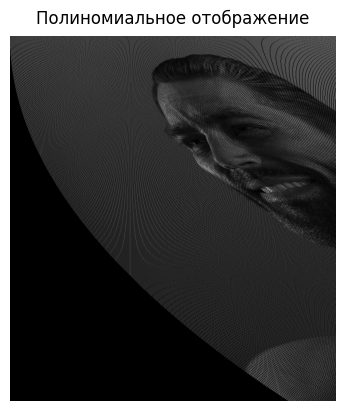

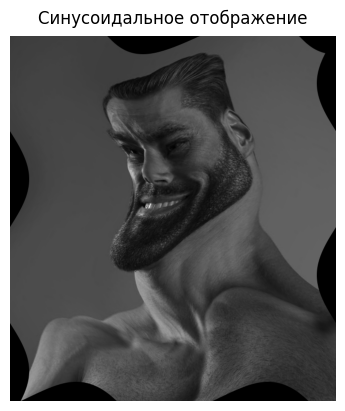

In [6]:
show(
    images=[
        it.img,
        it.shift(
            x=50,
            y=100
        ),
        it.reflection(
            axis=-1
        ),
        it.scale(
            x=3,
            y=1
        ),
        it.rotate(
            phi=30
        ),
        it.affine(
            dst=[[it.max_x, 0], [0, 0], [it.max_x-100, it.max_y-100]]
        ),
        it.skew(
            s=0.5
        ),
        it.piecewiselinear(
            stretch_x=2,
            stretch_y=5
        ),
        it.projection(
            dst=[[0+100, it.max_y-100], [it.max_x-100, it.max_y-100],
                 [it.max_x-50, 0], [0, 0]]
        ),
        it.polynomial(
            x_coefs=[0, 1, 0, 0.00001, 0.002, 0.001],
            y_coefs=[0, 0, 1, 0, 0, 0]
        ),
        it.sinusoidal(
            amplitudes=[40, 40],
            periods=[400, 400]
        ),
    ],
    labels=[
        'Исходное изображение',
        'Сдвиг $(x = 50, y = 100)$',
        'Отражение (по $x$ и $y$)',
        'Однородное масштабирование $(x = 3, y = 1)$',
        'Поворот $(phi = 30°)$',
        'Аффинное отображение',
        'Скос $(s=0.5)$',
        'Кусочно-линейное отображение\n $(stretch_x = 2, stretch_y = 5)$',
        'Проекционное отображение',
        'Полиномиальное отображение',
        'Синусоидальное отображение',
    ]
)

## Коррекция дисторсии

In [7]:
def distortion(img, dist_coeffs = [0, 0, 0, 0, 0]):
    '''
    k1, k2, p1, p2, k3
    '''
    rows, cols = img.shape[:2]
    mtx = np.array([[min(cols, rows), 0, cols / 2],
                    [0, min(cols, rows), rows / 2],
                    [0, 0, 1]])
    return cv2.undistort(img, mtx, np.array(dist_coeffs))

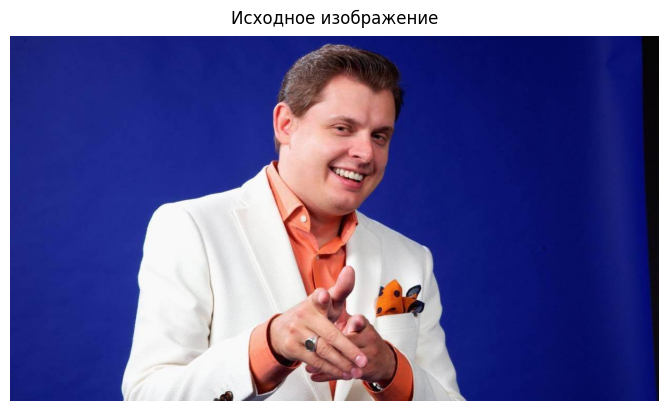

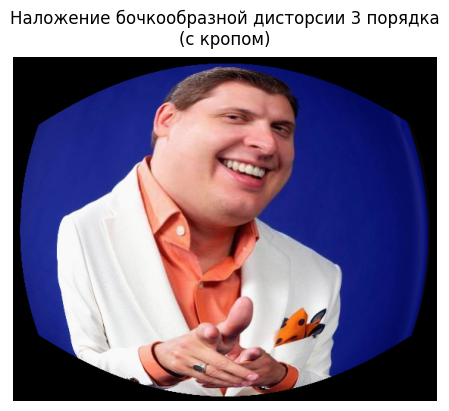

In [8]:
show(
    images=[
        cv2.imread('pictures/2.jpg'),
        distortion(cv2.imread('pictures/2.jpg'), [1, 50, 0, 0, 0])[120:575, 340:900]
    ],
    labels=[
        'Исходное изображение',
        'Наложение бочкообразной дисторсии 3 порядка\n(с кропом)'
    ]
)

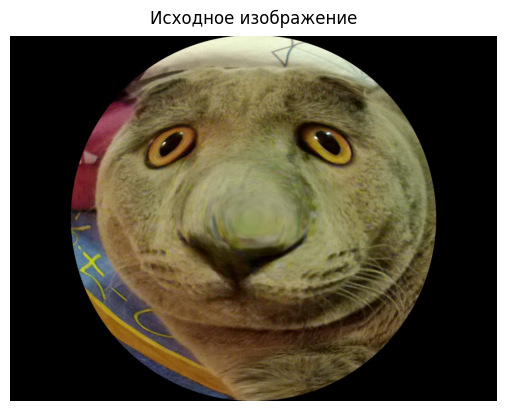

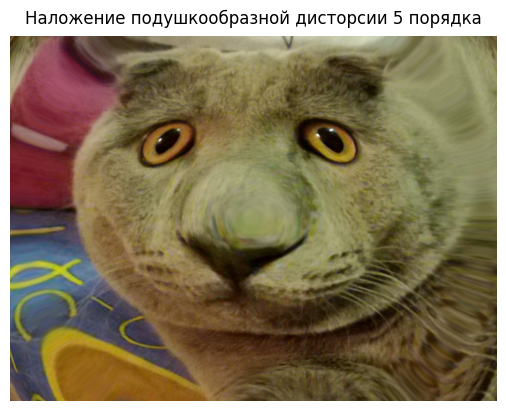

In [9]:
show(
    images=[
        cv2.imread('pictures/3.jpg'),
        distortion(cv2.imread('pictures/3.jpg'), [-0.3, -0.8, 0, 0, 0])
    ],
    labels=[
        'Исходное изображение',
        'Наложение подушкообразной дисторсии 5 порядка'
    ]
)

## «Склейка» изображений

In [10]:
def slitch_vertical(top_img, bot_img, template_size=10):
    
    template = top_img[-template_size:, :, :]
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(
        cv2.matchTemplate(bot_img, template, cv2.TM_CCOEFF))

    img = np.zeros((top_img.shape[0] + bot_img.shape[0] - max_loc[1] -
                    template_size, top_img.shape[1], top_img.shape[2]), dtype=np.uint8)

    img[0: top_img.shape[0], :, :] = top_img
    img[top_img.shape[0]:, :, :] = bot_img[max_loc[1] + template_size:, :, :]

    return img

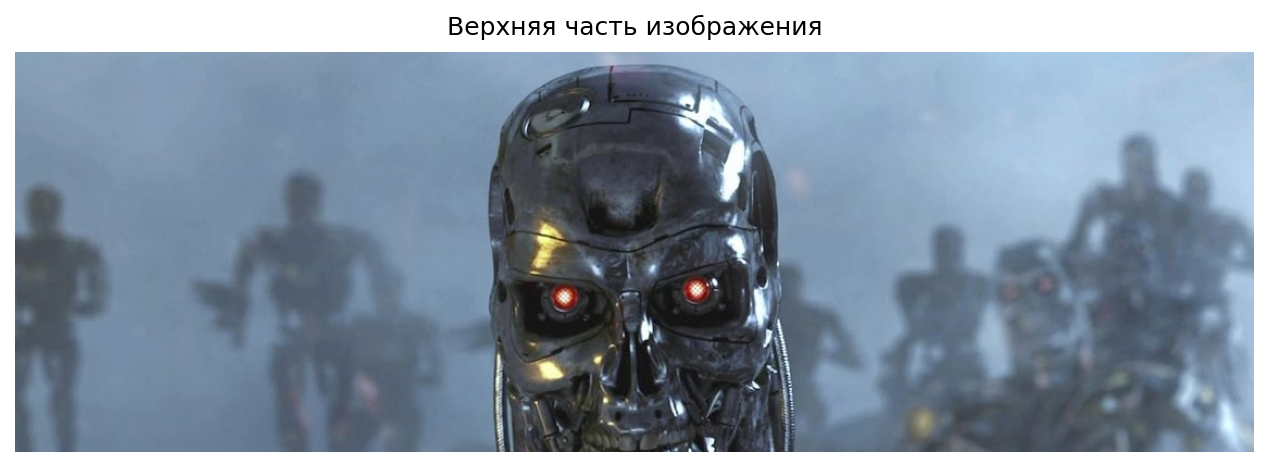

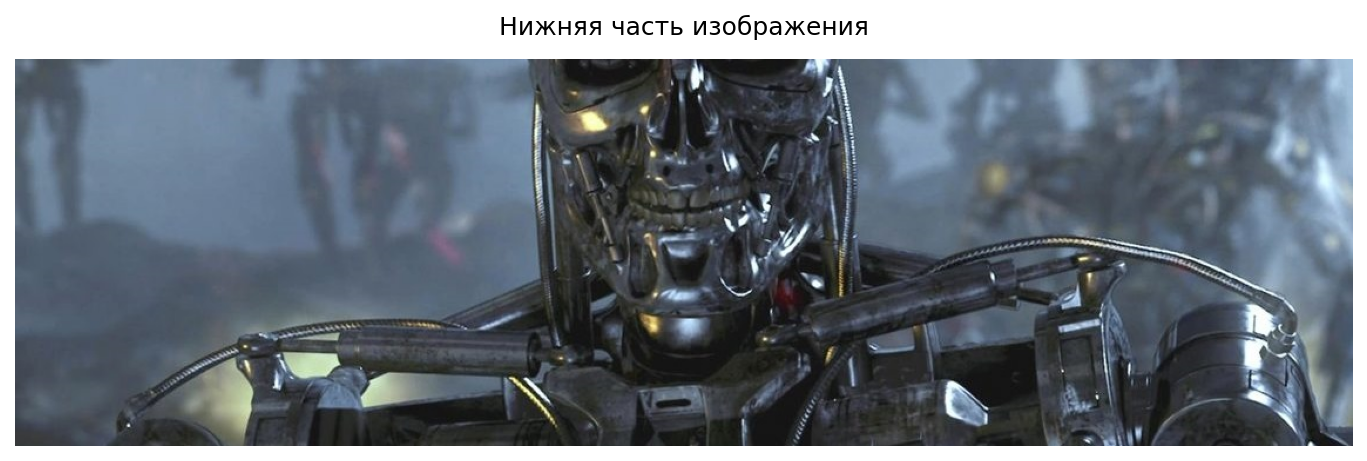

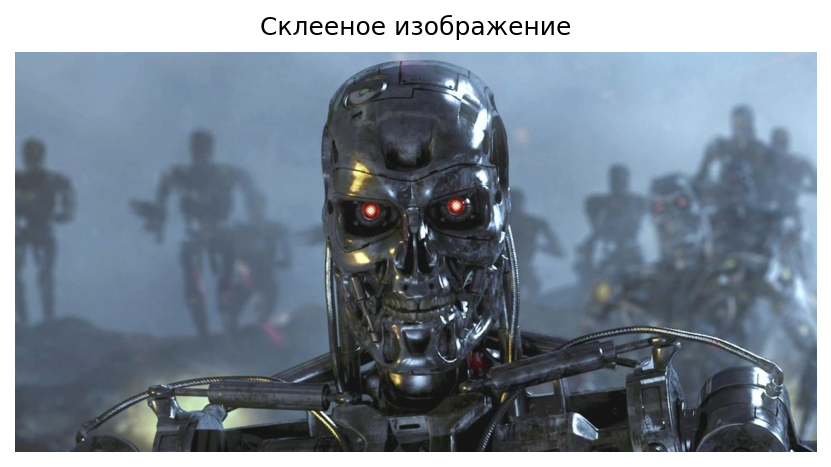

In [11]:
show(
    images=[
        cv2.imread('./pictures/4.jpg'),
        cv2.imread('./pictures/5.jpg'),
        slitch_vertical(
            top_img=cv2.imread('./pictures/4.jpg'),
            bot_img=cv2.imread('./pictures/5.jpg')
        )
    ],
    labels=[
        'Верхняя часть изображения',
        'Нижняя часть изображения',
        'Склееное изображение'
    ],
    figsize=(9, 3),
    dpi=150,
)

In [12]:
def auto_stitcher(images):
    stitcher = cv2.Stitcher.create(cv2.Stitcher_SCANS)
    status, img = stitcher.stitch(images)
    if cv2.Stitcher_OK == status:
        return img
    else:
        raise Exception('The images was not stitched together')

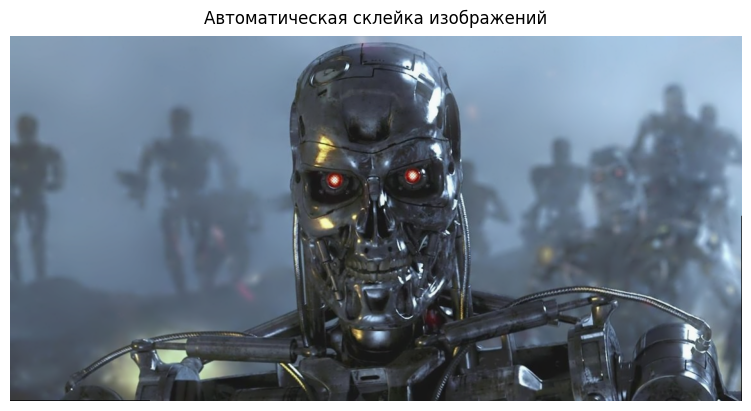

In [13]:
show(
    images=auto_stitcher([cv2.imread('./pictures/4.jpg'),
                          cv2.imread('./pictures/5.jpg')]),
    labels='Автоматическая склейка изображений'
)

# Дополнительные источники

* [Полиномиальные преобразования. Формулы и примеры расчетов полиномиальных преобразований](https://gis-lab.info/qa/polynom.html)
* [Affine Transformation](https://theailearner.com/tag/cv2-getaffinetransform/)
* [Perspective Transformation](https://theailearner.com/tag/cv2-getperspectivetransform/)